In [5]:
import sys 
sys.path.append("/workspace/Darth/darth/")
sys.path.append("/workspace/Darth/")

In [6]:
from darth.downloader import downloader

In [7]:
Google=downloader("Google China",thread_count=8)

# ---------------------------------------------------------------------------- #
#                            MAP Production Toolkit                            #
# ---------------------------------------------------------------------------- #
# ---------------------- MAP Serverv Init Successful by ---------------------- #
# ---------------------- Google China ---------------------------------------- #


In [8]:
Google.add_cord(116.3, 39.9, 116.6, 39.7, 13)
Google.download()

# -----WGS BoundingBox: (116.27325422704708, 39.90850398784923, 116.62506415757257, 39.67233079805734)
# -----Mercator BoudingBox: (12943479.451629978, 4852655.222148937, 12982642.753946641, 4818439.909406773)
# -----Total tiles number：8 X 7


  0%|          | 0/56 [00:00<?, ?it/s]

# -----Url Queue size: 56


100%|██████████| 56/56 [00:00<00:00, 57.96it/s]

# ===== Decode Downloading...
# ------------------------------- Download Done ------------------------------ #

# ===== Save description done Google China-Sun Jun 28 10:51:01 2020-(116.3, 39.9, 116.6, 39.7)-13.json


In [9]:
tiles=[i["path"] for i in Google.result]

In [10]:
from darth.vector import Vector
vecfile="/workspace/osm-2017-07-03-v3.6.1-china_beijing.mbtiles"
Building=Vector(vecfile)#3.7GB SQLite-MBTiles . The China Main Class Vector Object.


# ---------------------------------------------------------------------------- #
#                                Vector Toolkit                                #
# ---------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------- #
#                            TIFF process Toolkit                              #
# ---------------------------------------------------------------------------- #
# -----Class TIF init without filename
# -----Valid vector format : mbtiles

# ----------------------------- Meta Information ----------------------------- #
# -----ZOOM_LEVEL : 14                                                         #
# -----attribution : <a href="http://www.openmaptiles.org/" target="_blank">&co#
# -----center : 116.4025,39.92,14                                              #
# -----description : Extract from https://openmaptiles.org                     #
# -----maxzoom : 14             

In [11]:
Building.getDefaultLayerbyName("building")

# -----Set Default Layer | building | :  <osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7f2def7f37b0> >


<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7f2def7f37b0> >

In [12]:
Building.crop_default_layer_by_rect(Google.mercator_cord)#FILTER to speed up
label=Building.generate(tiles)

  0%|          | 0/56 [00:00<?, ?it/s]

# -----Set filter Rect: (12943479.451629978, 4852655.222148937, 12982642.753946641, 4818439.909406773)
# ===== Start Generate.....


100%|██████████| 56/56 [00:27<00:00,  2.03it/s]


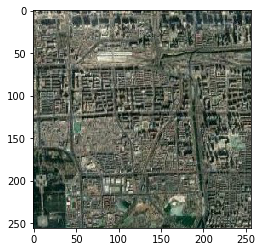

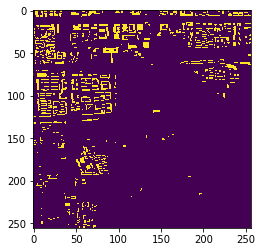

(<matplotlib.image.AxesImage at 0x7f2dece74080>, None)

In [13]:
import tifffile as tif 
import matplotlib.pyplot as plt
image=tif.imread(tiles[1])
label=tif.imread(label[1])
plt.imshow(image),plt.show()
plt.imshow(label),plt.show()